# Project 1 - Amazon India Sales Analysis
---

### Analysis:
---

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
amazon_data_path = "data/amazon.csv"

# Read the mouse data and the study results
amazon_data = pd.read_csv(amazon_data_path)

# Display the data table for preview

amazon_data[["category", "full_category"]] = amazon_data["category"].str.split('|',n=1 ,expand=True)

amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,full_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Accessories&Peripherals|Cables&Accessories|Cab...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Accessories&Peripherals|Cables&Accessories|Cab...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Accessories&Peripherals|Cables&Accessories|Cab...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Accessories&Peripherals|Cables&Accessories|Cab...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Accessories&Peripherals|Cables&Accessories|Cab...


In [2]:
amazon_data = amazon_data.dropna()

In [3]:
# Check for any null values
amazon_data.isnull().sum().sum()

0

In [4]:
amazon_data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'full_category'],
      dtype='object')

In [5]:
pricing_rating_data = amazon_data.loc[:,["product_id", "product_name", "category", "discounted_price", "actual_price", "discount_percentage", 
                                         "rating", "rating_count", "review_id", "review_title", "review_content"]]
pricing_rating_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,24269.0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,43994.0,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,7928.0,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,94363.0,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,16905.0,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [6]:
category_data = amazon_data.loc[:,["product_id", "product_name", "category", "discounted_price", "actual_price", "discount_percentage", 
                                         "rating", "rating_count"]]
category_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,16905.0


In [7]:
review_data = amazon_data.loc[:,["product_id", "product_name", "rating", "rating_count", "review_id", "review_title", "review_content"]]
review_data.insert(7, "Length of Review", '')
for index, row in review_data.iterrows():
    review_data.loc[index, "Length of Review"] = len(review_data.loc[index,"review_content"])

review_data.head()

,product_id,product_name,rating,rating_count,review_id,review_title,review_content,Length of Review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269.0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,43994.0,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,7928.0,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,94363.0,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,16905.0,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the ratings.
ratings_data = pricing_rating_data.set_index(["product_id"])

# Use groupby and summary statistical methods to calculate the following properties of each column: 
# mean, median, variance, standard deviation, and SEM.
grouped_ratings_data = ratings_data.groupby("category")
ratings_mean = grouped_ratings_data["rating"].mean()
ratings_median = grouped_ratings_data["rating"].median()
ratings_var = grouped_ratings_data["rating"].var()
ratings_std = grouped_ratings_data["rating"].std()
ratings_sem = grouped_ratings_data["rating"].sem()

# Assemble the resulting series into a single summary DataFrame.
ratings_summary_df  = pd.DataFrame({"Mean Rating":  ratings_mean, "Median Rating":  ratings_median,
                                    "Rating Variance":  ratings_var, "Rating Std. Dev.":  ratings_std,
                                    "Rating Std. Err.":  ratings_sem})
ratings_summary_df

,Mean Rating,Median Rating,Rating Variance,Rating Std. Dev.,Rating Std. Err.
category,,,,,
Car&Motorbike,3.800000,3.80,NaN,NaN,NaN
Computers&Accessories,4.155654,4.20,0.063896,0.252776,0.011903
Electronics,4.081749,4.10,0.072695,0.269620,0.011756
Health&PersonalCare,4.000000,4.00,NaN,NaN,NaN
Home&Kitchen,4.040402,4.10,0.111809,0.334379,0.015798
HomeImprovement,4.250000,4.25,0.125000,0.353553,0.250000
MusicalInstruments,3.900000,3.90,0.020000,0.141421,0.100000
OfficeProducts,4.309677,4.30,0.022237,0.149119,0.026783
Toys&Games,4.300000,4.30,NaN,NaN,NaN


In [9]:
category_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,16905.0


In [10]:
sales_by_category = category_data["category"].value_counts()
print(sales_by_category)

category
Electronics              526
Computers&Accessories    451
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


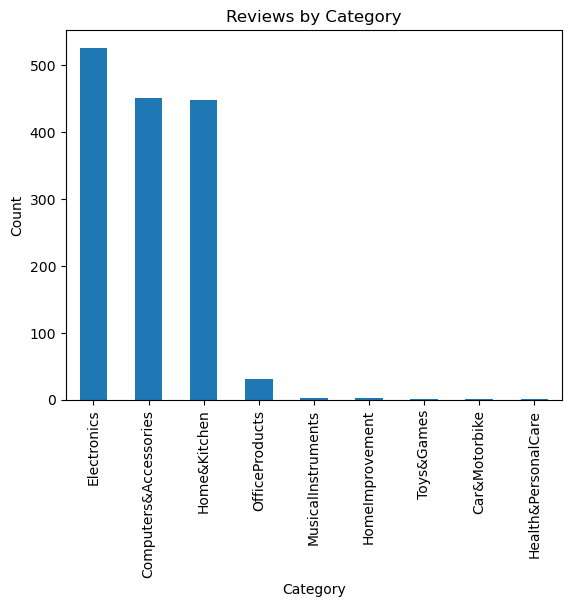

In [11]:
ax = category_data["category"].value_counts().plot(kind = 'bar', title = 'Reviews by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

In [12]:
electronics_df = category_data[category_data["category"] == 'Electronics']

In [13]:
computers_df = category_data[category_data["category"] == 'Computers&Accessories']

In [14]:
home_df = category_data[category_data["category"] == 'Home&Kitchen']

In [15]:
# clean data for calculations
category_data['discounted_price'] = category_data['discounted_price'].str.replace('₹','')
category_data['discounted_price'] = category_data['discounted_price'].str.replace(',','')
category_data['actual_price'] = category_data['actual_price'].str.replace('₹','')
category_data['actual_price'] = category_data['actual_price'].str.replace(',','')

In [16]:
category_data.rename(columns = {'discounted_price':'discounted_price_rupees',
                                'actual_price':'actual_price_rupees'}, inplace = True) 
category_data.head()

,product_id,product_name,category,discounted_price_rupees,actual_price_rupees,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399,1099,64%,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199,349,43%,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199,1899,90%,3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329,699,53%,4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154,399,61%,4.2,16905.0


In [17]:
category_data['discounted_price_dollars'] = category_data['discounted_price_rupees'].astype(float)/83.14
category_data['actual_price_dollars'] = category_data['actual_price_rupees'].astype(float)/83.14
category_data['discounted_price_dollars'] = category_data['discounted_price_dollars'].map('{:,.2f}'.format)
category_data['actual_price_dollars'] = category_data['actual_price_dollars'].map('{:,.2f}'.format)
category_data.head()

,product_id,product_name,category,discounted_price_rupees,actual_price_rupees,discount_percentage,rating,rating_count,discounted_price_dollars,actual_price_dollars
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399,1099,64%,4.2,24269.0,4.80,13.22
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199,349,43%,4.0,43994.0,2.39,4.20
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199,1899,90%,3.9,7928.0,2.39,22.84
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329,699,53%,4.2,94363.0,3.96,8.41
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154,399,61%,4.2,16905.0,1.85,4.80


In [34]:
def label_function(val):
    return f'{val / 100 * len(category_data):.0f}\n{val:.0f}%'

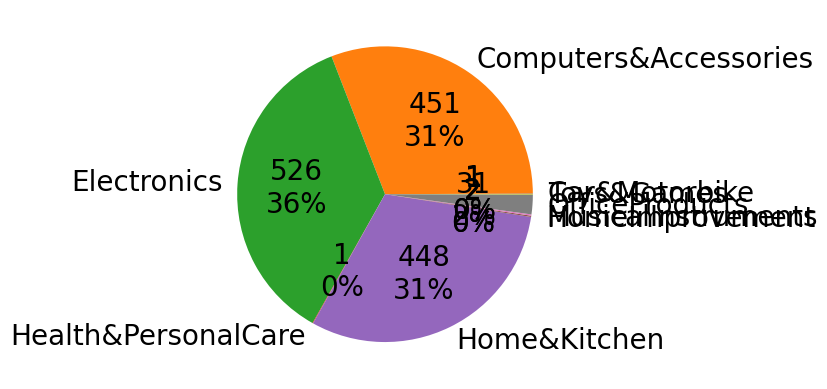

In [41]:
ax = category_data.groupby('category').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})
plt.show()

In [48]:
# Drop Categories to allow only top 3
focused_category_data = category_data.drop(category_data[category_data['category'] == 'Toys&Games'].index)
focused_category_data = focused_category_data.drop(category_data[category_data['category'] == 'OfficeProducts'].index)
focused_category_data = focused_category_data.drop(category_data[category_data['category'] == 'MusicalInstruments'].index)
focused_category_data = focused_category_data.drop(category_data[category_data['category'] == 'HomeImprovement'].index)
focused_category_data = focused_category_data.drop(category_data[category_data['category'] == 'Car&Motorbike'].index)
focused_category_data = focused_category_data.drop(category_data[category_data['category'] == 'Health&PersonalCare'].index)

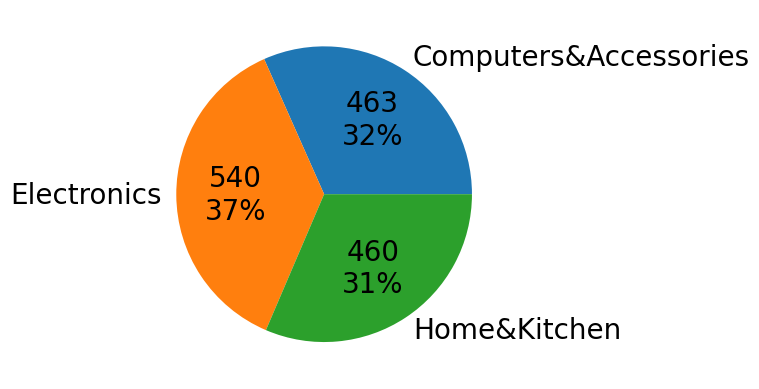

In [49]:
ax = focused_category_data.groupby('category').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})
plt.show()